# Vehicle Routing Problem (VRP)

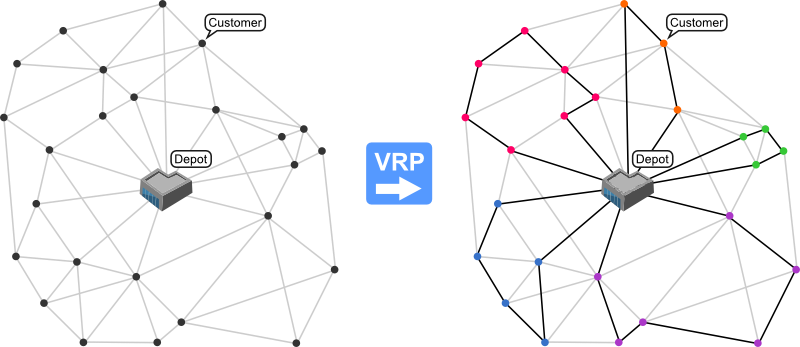

In [148]:
import gurobipy
import numpy as np
import matplotlib.pyplot as plt

[https://www.gurobi.com/](https://www.gurobi.com/) A really good optimization software used by companies like toyota, mercedes, basf etc.

## Generating problem instance...

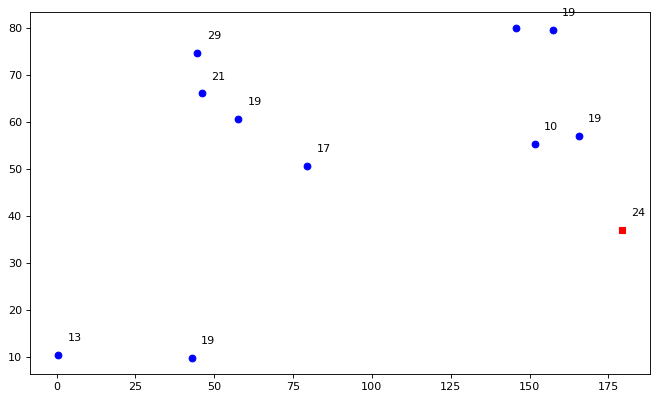

In [200]:
#Input Data
rnd = np.random
n = 10
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
N = [i for i in range(1,n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i != j]
c = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
Q = 50
q = {i: rnd.randint(10,30) for i in N}
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c = 'b')


for i, txt in enumerate(q):
    plt.annotate(q[txt], (xc[i]+3, yc[i]+3))



## Building the mathematical model

In [202]:
from gurobipy import Model, GRB, quicksum

In [203]:
mdl = Model("CVRP")
mdl.setParam('TimeLimit', 30)

Set parameter TimeLimit to value 30


In [204]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [205]:
mdl.modelSense = GRB.MINIMIZE

In [206]:
mdl.setObjective(quicksum(x[a]*c[a] for a in A))


min! $\sum_{i,j \in \mathcal{A}}  c_{i,j} \cdot x_{i,j}$ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall i \in N $ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall j \in N $ 

if $x_{i,j} \rightarrow u_i + q_j = u_j \,\,\, \forall  k \in \mathcal{K} ,t \in \mathcal{T}$

$q_i \leq u_i \leq Q \; \forall i \in N$

$x_{i,j} \in {0,1}$

In [207]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)== 1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if j!=i)== 1 for j in N);
mdl.addConstrs((x[i,j] == 1) >> (u[i] + q[i] == u[j])
              for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i] >= q[i] for  i in N);
mdl.addConstrs(u[i] <= Q for i in N);

## Perform Solution procedure with gurobi

In [208]:
mdl.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0xbabbcf6d
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
  GenCon rhs range [1e+01, 3e+01]
  GenCon coe range [1e+00, 1e+00]
Presolve added 100 rows and 0 columns
Presolve removed 0 rows and 25 columns
Presolve time: 0.03s
Presolved: 140 rows, 95 columns, 1041 nonzeros
Variable types: 14 continuous, 81 integer (81 binary)
Found heuristic solution: objective 1478.6530380

Root relaxation: objective 6.886622e+02, 51 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

In [224]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [225]:
def FindEdgeByStartingNode(Node, li):
    for e in li:
        if(e[0] == Node):
            return e

In [226]:


def GetRouteRemoveEdgesFromLi(startingEdge, li): 
    x = startingEdge
    tour = []
    tour.append(startingEdge)
    
    while(True):
        x = findEdgeByStartingNode(x[1], li)
        tour.append(x)
        
        if(x[1] == 0):
            break
            
        li.pop(li.index(x))
    
    return tour



numberOfRoutes = 0
for e in li:
    if(li[0] == 0):
        numberOfRoutes+=1
routes = []

for i in range(0,numberOfRoutes):
    routes.append(GetRouteRemoveEdgesFromLi(active_arcs[i],active_arcs))
    #we get error message when amoutn of routes is less than 3
    
active_arcs = [a for a in A if x[a].x > 0.99]

NameError: name 'numberOfRoutes' is not defined

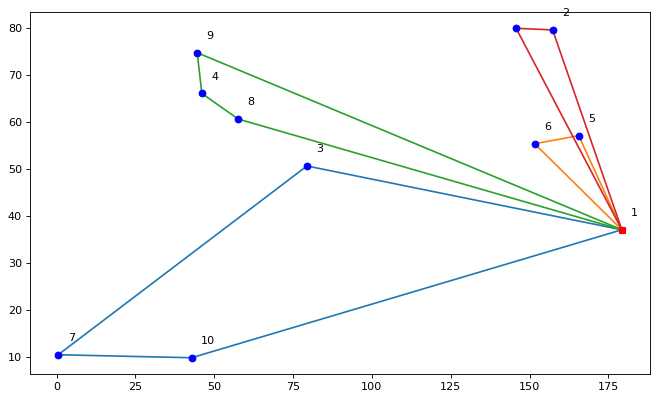

In [223]:
color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

plt.figure(figsize=(10, 6), dpi=80) 
for idx, route in enumerate(routes):
    for i,j in route:
        plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c=f'{color[idx]}', zorder=0)
  
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))

In [215]:
routes

[[(0, 2), (2, 6), (6, 9), (9, 0)], [(0, 4), (4, 5), (5, 0)]]

# Things to consider when thinking about planning of intralogistic processes

In [213]:
routes

[[(0, 2), (2, 6), (6, 9), (9, 0)], [(0, 4), (4, 5), (5, 0)]]

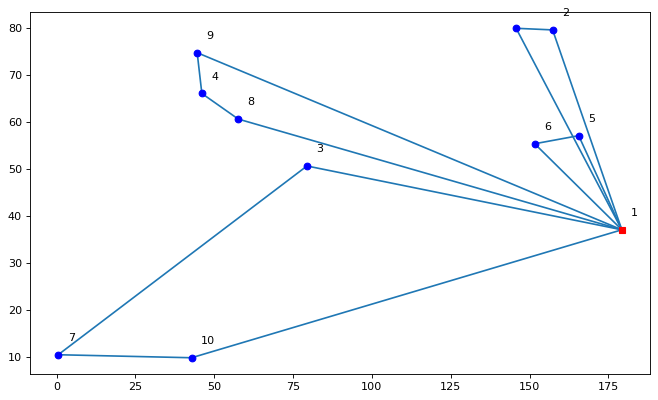

In [214]:
color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

plt.figure(figsize=(10, 6), dpi=80) 
for i,j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c="tab:blue", zorder=0)
  
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))